# Data Loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Customer_Behaviour.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Data Preprocessing

In [6]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [7]:
data = data.dropna()

In [8]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


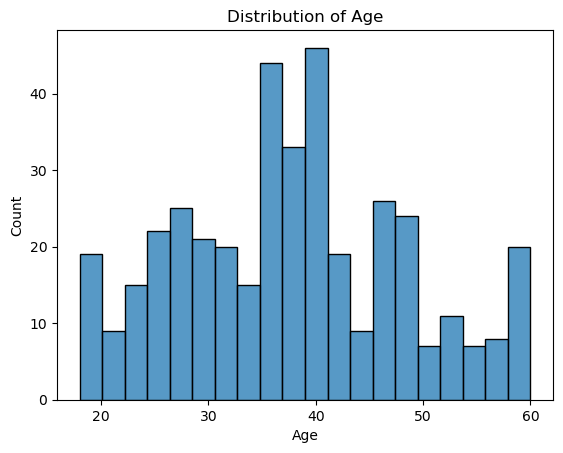

In [10]:
# Visualize the distribution of the 'Age' feature

sns.histplot(data['Age'], bins=20)
plt.title('Distribution of Age')
plt.show()

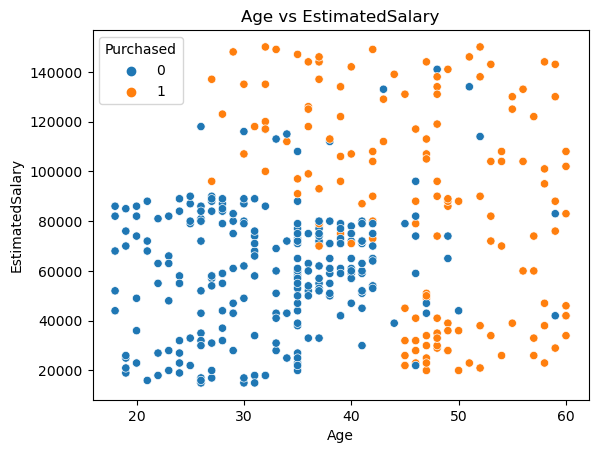

In [11]:
# Visualize the relationship between 'Age' and 'EstimatedSalary'

sns.scatterplot(x='Age', y='EstimatedSalary', data=data, hue='Purchased')
plt.title('Age vs EstimatedSalary')
plt.show()

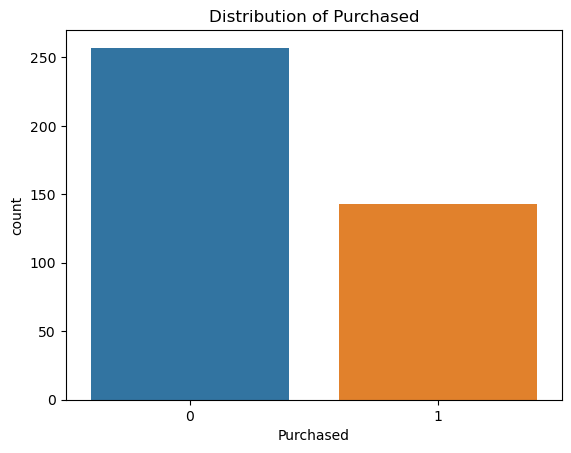

In [12]:
# Visualize the distribution of the target variable 'Purchased'

sns.countplot(x='Purchased', data=data)
plt.title('Distribution of Purchased')
plt.show()


# Outlier check


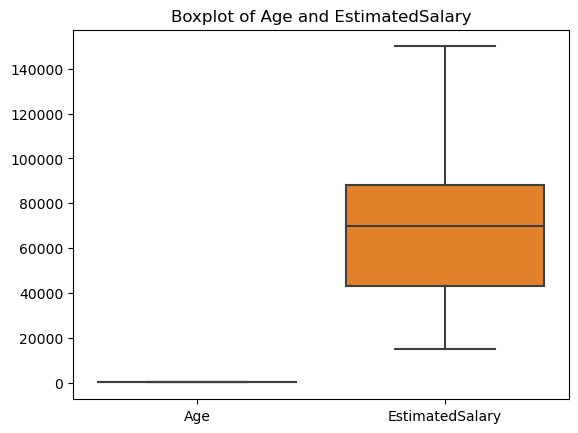

In [13]:
sns.boxplot(data=data[['Age', 'EstimatedSalary']])
plt.title('Boxplot of Age and EstimatedSalary')
plt.show()

In [14]:
# Outlier detection and treatment for 'Age' using IQR method

Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

In [15]:
# Outlier detection and treatment for 'EstimatedSalary' using IQR method

Q1 = data['EstimatedSalary'].quantile(0.25)
Q3 = data['EstimatedSalary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['EstimatedSalary'] >= lower_bound) & (data['EstimatedSalary'] <= upper_bound)]

# Feature Engineering

In [16]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
# Convert categorical variables into numerical format (if necessary)
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [19]:
data.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

# Model selection and training 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [21]:
X = data.drop(columns=['Purchased', 'User ID'])
y = data['Purchased']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model Evaluation

In [26]:
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

In [27]:
classification_report(y_train, y_pred_train)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       205\n           1       0.99      1.00      1.00       115\n\n    accuracy                           1.00       320\n   macro avg       1.00      1.00      1.00       320\nweighted avg       1.00      1.00      1.00       320\n'

In [28]:
classification_report(y_test, y_pred_test)

'              precision    recall  f1-score   support\n\n           0       0.92      0.90      0.91        52\n           1       0.83      0.86      0.84        28\n\n    accuracy                           0.89        80\n   macro avg       0.87      0.88      0.88        80\nweighted avg       0.89      0.89      0.89        80\n'

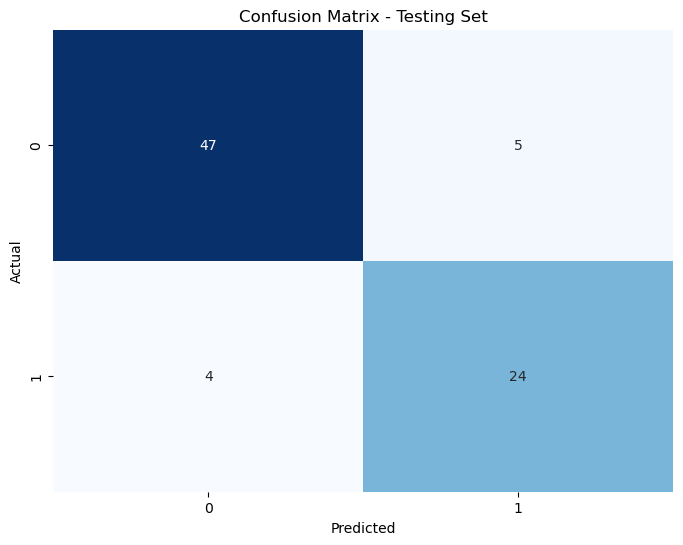

In [29]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()

In [30]:
import pickle

In [32]:
with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)